### A STUDY ON COVID-19 CASES BY MUNICIPALITY IN THE NETHERLANDS ON THE REAL TIME RIVM.NL DATABASE (24/III)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
from lxml import html

In [12]:
RIVM_URL = "https://www.rivm.nl/coronavirus-kaart-van-nederland"
url = requests.get(RIVM_URL)
web = html.fromstring(url.content)
data = web.get_element_by_id("csvData").text
data = data.lstrip()

dataset = data.split("\n")[1].split(";")[0]

with open("dataset.csv", "w", encoding="utf-8") as f:
    f.write(data)

In [13]:
df=pd.read_csv("dataset.csv", sep=";", header=None, index_col=None)
df=df.drop(0)
df=df.drop(1)
headers=["Gemnr","Municipality","Case_Number","Population","1/100.000",]
df.columns=headers
df=df.drop(df.columns[0], axis=1)
df=df.drop(df.columns[3], axis=1)
#df=df.drop(df.columns[2], axis=1)

df.head()

,Municipality,Case_Number,Population
2,'s-Gravenhage,63,537833
3,'s-Hertogenbosch,67,154205
4,Aa en Hunze,1,25386
5,Aalsmeer,9,31728
6,Aalten,1,27011


In [14]:
df.Municipality.count() # Municipality Number in the NL

355

In [15]:
df['Case_Number'] = pd.to_numeric(df['Case_Number'])
print(df.Case_Number.dtypes)

int64


In [16]:
df_sum=df.Case_Number.sum()
print(f'The total Case Number in the Netherlands is {df_sum}.')

The total Case Number in the Netherlands is 5360.


In [17]:
df_max = df.Case_Number.max()
df_max_mun=df.Municipality[df.Case_Number == df_max]
print(f"The municipality where the case number is the highest in the Netherlands is {df_max_mun.to_string(header=False, index=False)}).")
print(f"The case number in {df_max_mun.to_string(header=False, index=False)} is {str(df_max)}.")

The municipality where the case number is the highest in the Netherlands is  Amsterdam).
The case number in  Amsterdam is 250.


In [18]:
df_maxs=df.sort_values(ascending=False, by='Case_Number').head(20) #The municipalities where the case number is the highest in the NL.
df_maxs

,Municipality,Case_Number,Population
19,Amsterdam,250,862965
287,Tilburg,211,217259
53,Breda,167,183873
255,Rotterdam,163,644618
296,Utrecht,160,352866
191,Meierijstad,139,80815
188,Maastricht,94,121565
208,Nijmegen,93,176731
292,Uden,92,41782
266,Sittard-Geleen,84,92661


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

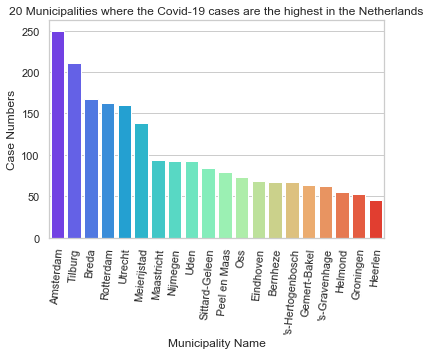

In [19]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x=df_maxs.Municipality, y=df_maxs.Case_Number, data=df_maxs, palette='rainbow')
ax.set(xlabel='Municipality Name', ylabel='Case Numbers', title='20 Municipalities where the Covid-19 cases are the highest in the Netherlands')
plt.xticks(rotation=85)

In [20]:
df.sort_values(by='Case_Number').head(30) #The municipalities where the case number is the lowest in the NL.

,Municipality,Case_Number,Population
330,Westerwolde,0,25199
68,Dantumadiel,0,18923
154,Hulst,0,27524
183,Loppersum,0,9614
21,Appingedam,0,11721
220,Oldambt,0,38129
227,Ooststellingwerf,0,25497
48,Borger-Odoorn,0,25372
245,Renswoude,0,5259
16,Ameland,0,3673


In [ ]:
def matching():
    
    while True:    
        
        Den_Bosch_other="'s-Hertogenbosch" 
        Den_Bosch="Den Bosch"
        
        Den_Haag_other="'s-Gravenhage"
        Den_Haag="Den Haag"
    
        input_loc=input("Pls, Write your municipality?   ")  
        
        if input_loc == Den_Bosch:
            search=df.Case_Number[df.Municipality==str(Den_Bosch_other)]
            time.sleep(1)
            print(f"The latest total case number in {input_loc} is  {search.to_string(header=False, index=False)}")
                
        elif input_loc == Den_Haag:
        
            search=df.Case_Number[df.Municipality==str(Den_Haag_other)]
            time.sleep(1)
            print(f"The latest total case number in {input_loc} is  {search.to_string(header=False, index=False)}")

        else:
            search=df.Case_Number[df.Municipality==str(input_loc)]
            time.sleep(1)
            print(f"The latest total case number in {input_loc} is  {search.to_string(header=False, index=False)}")
            matching()
        
matching()